In [10]:
%matplotlib inline
%run plots_test.ipynb

import imp, plotto, pandas as pd,  matplotlib.units, numpy as np, matplotlib.pyplot as plt
imp.reload(plotto)
pd.set_option('display.max_colwidth', -1)


ureg = plotto.ureg

simul = plotto.query("/tmp/antonio/magneticum.sql.dm")


/home/moon/ragagnin/anaconda3/lib/python3.6/site-packages/pint/quantity.py:1338: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
plots_test.ipynb:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "    .dataframe tbody tr th:only-of-type {\n",
plots_test.ipynb:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "    .dataframe tbody tr th {\n",
plots_test.ipynb:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }


<IPython.core.display.Javascript object>

In [12]:

simul ("""
            select snap.id as snap_id,simulation.name, simulation.box_size, h, redshift, a,A.count as "Nhaloes", B.count as "n_pp", min_glen
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count, min(glen) as min_glen
                from fof
                --inner join pp
                --on pp.id_cluster = fof.id_cluster and fof.snap_id = pp.snap_id
                where   fof.glen>1e4
                group by fof.snap_id
            ) as A on A.id = snap.id
            left outer join (
                select pp.snap_id as id,count(*) as count
                from pp
                group by pp.snap_id
            ) as B on B.id = snap.id
            order by simulation.name,redshift
       """)


,snap_id,name,box_size,h,redshift,a,Nhaloes,n_pp,min_glen
0,5,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,2.220446e-16,1.000000,44537,44537,32463
1,6,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,4.701941e-01,0.680182,11311,11311,31956
2,7,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,1.178895e+00,0.458948,486,486,31662
3,8,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,1.477581e+00,0.403619,93,93,32334
4,9,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,1.980082e+00,0.335561,9,9,27793
5,10,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,2.520891e-01,0.798665,156110,156110,10557
6,11,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,4.701941e-01,0.680182,146339,146339,10585
7,12,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,1.178895e+00,0.458948,99669,99669,10570
8,13,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,1.706354e+00,0.369501,63542,63542,10910
9,14,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,1.980082e+00,0.335561,48925,48925,10801


In [13]:
simul("""
SELECT t1.snap_id, t1.id_cluster,t1.glen
FROM fof t1
LEFT JOIN pp t2 ON t2.snap_id = t1.snap_id and t2.id_cluster=t1.id_cluster
WHERE t2.id_cluster IS NULL
and t1.snap_id=3
""")

,snap_id,id_cluster,glen


In [14]:
all_df_z0 = simul ("""
    select  fof.mcri, fof.tgas0, fof.r5cc, fof.rvir, fof.m5cc, fof.glen, fof.rcri, fof.id_cluster as fof_id_cluster,pp.id_cluster as pp_id_cluster, pp.*
    from fof
    inner join pp on fof.snap_id=pp.snap_id and fof.id_cluster = pp.id_cluster
    inner join snap on  fof.snap_id = snap.id
    inner join simulation on simulation.id = snap.simulation_id
    and instr( simulation.name,'_dm')<=0
    --and fof.glen>1e4
   -- and pp.fossilness>=0
   -- and pp.fossilness< 
   -- and snap.tag='z0'
    --and snap.id= 5
    """)



Text(0,0.5,'glen')

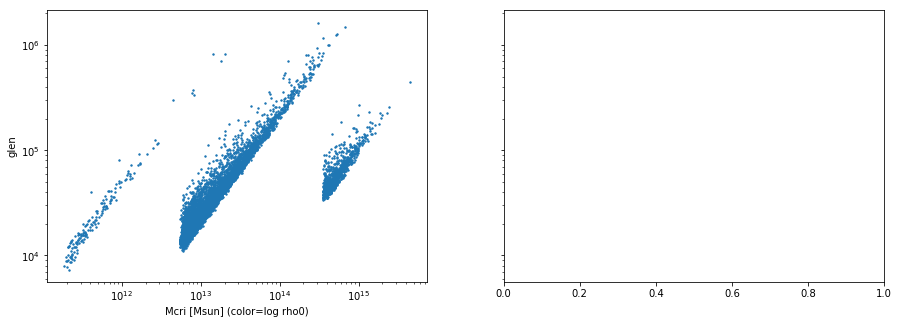

In [15]:


n_subsample = 10000
rdf = all_df_z0.sample(n=n_subsample)
f,a12 = plt.subplots(1,2, sharey=True, figsize=(15,5))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( (ureg.gmass*rdf.mcri).to('Msun'),rdf.glen,  s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_xlabel("Mcri [Msun] (color=log rho0)")
a1.set_ylabel("glen")


In [ ]:
fig,a = plt.subplots(1,1, figsize=(18,10))
df=all_df_z0#.sample(n=100000)
#colormap, norm = plotto.gen_supermap(all_df_z0.fossilness)
a.scatter((ureg.gmass*df.mcri).to('Msun'),df.c200c, s=1, label='Magneticum Box0/mr, Box2b/hr, Box4/uhr',color='darkslategray') #c=rdf.redshift, s=2)
def sc(c0,a):
    return lambda x: c0*(x/1.e14)**a

for interp_observation_name in interp_observations:
    obs = interp_observations[interp_observation_name]
    x = np.logspace(obs.xrange[0],obs.xrange[1],3)
    if 'h' in obs.__dict__ and obs.h==True:
        x=x/.704
    y = sc(obs.c1e14,obs.B)(x)
    a.plot(x,y, linewidth=3, label=interp_observation_name, **{"linestyle":":"} if 'sim' in obs.__dict__ and  obs.sim else {})

x = np.logspace(11,15.2,4)
y = sc(4.5,-0.1)(x)

a.plot(x,y, linewidth=3,linestyle=":",color="black",label="This Work")


    

a.errorbar(pratt2005.m, pratt2005.c, yerr=pratt2005.cpm, fmt='+',color="red",label="Pratt et al. 2005")


a.errorbar(martinsson.m200.value,
               martinsson.c200c.value,
               xerr=[martinsson.m200.minus,martinsson.m200.plus ], 
               yerr=[martinsson.c200c.minus, martinsson.c200c.plus ],
               color='cyan',
               fmt='+', label="Martinsson et al. 2014")

for idx, row in meneghetti.iterrows():
    a.errorbar(row.M200c.value.to('Msun'),
               row.c200c.value,
               xerr=[[row.M200c.minus.to('Msun')], [row.M200c.plus.to('Msun')]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]], 
               color='red',
               fmt='o', **{"label":'Meneghetti et al. 2014' } if idx==0 else {} )

for idx, row in clash.iterrows():
    a.errorbar(row.m200c.value.to('Msun'),
               row.c200c.value,
               xerr=[[row.m200c.minus.to('Msun')], [row.m200c.plus.to('Msun')]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]], 
               color='magenta',
               fmt='+', **{"label":'Merten et al. 2015' } if idx==0 else {} )
    
for idx, row in mantz.iterrows():
    a.errorbar(row.m200.value.to('Msun'),
               row.c200.value,
               xerr=[[row.m200.minus.to('Msun')], [row.m200.plus.to('Msun')]], 
               yerr=[[row.c200.plus], [row.c200.minus]],
               color='green',
               fmt='+', **{"label":'Mantz et al. 2016' } if idx==0 else {} )

    
for idx, row in andrea_old.iterrows():
    a.errorbar(row.m200c.value,
               row.c200c.value,
               xerr=[[row.m200c.minus], [row.m200c.plus]], 
               yerr=[[row.c200c.plus], [row.c200c.minus]],
               color='blue',
               fmt='+', **{"label":'Biviano et al. 2017' } if idx==0 else {} )


    
set_Mc_lims(a)
a.set_xlabel('M200 [Msun]', fontsize=13)
a.set_ylabel('c200', fontsize=13)
fig.savefig('/home/moon/ragagnin/MagneticumMC/res/misuri.png',bbox_inches='tight')


In [ ]:


fig,a = plt.subplots(1,1, figsize=(18,10))
all_df_z0.fossilness = np.array(all_df_z0.fossilness, dtype=np.float32)
#display(all_df_z0.fossilness[~(all_df_z0.fossilness>=0)])
plotdf = all_df_z0[(all_df_z0.fossilness>0)&(all_df_z0.fossilness<np.inf)]
#all_df_z0=all_df_z0[all_df_z0.fossilness>0]#.sample(n=100)
#df = 
colormap, norm = plotto.gen_supermap(plotdf.fossilness,poutside=0.1)


c500 = plotdf.r5cc/plotdf.rcri*plotdf.c200c
m500 = ureg.gmass*plotdf.mcri*(500./200.)*(c500/plotdf.c200c)**3

#m500,c500 = convert_mass_and_concentration(500., 200.,df.c200c, ureg.gmass*df.mcri)
#display(m500.to('Msun'))
#display(c500)
#display(plotdf.fossilness)
scatter = a.scatter(m500.to('Msun'),c500, c= plotdf.fossilness, s=1, norm=norm, cmap=colormap) #c=rdf.redshift, s=2)
cbar_ax = fig.add_axes([0.1, 0.0, 0.82, 0.02])
colorbar = fig.colorbar(scatter, label="fossilness",cax=cbar_ax,  orientation='horizontal')
colorbar.set_label('fossilness',size=13)

"""    
for idx, row in pratt.iterrows():
    color = colorbar.to_rgba(10.**(row.Deltam.value/2.5) )
    a.errorbar(row.M500.value, row.c500.value, 
               xerr=[[row.M500.minus], [row.M500.plus]],
               yerr=[[row.c500.minus], [row.c500.plus]],
               #c=color, ecolor=color, linewidth=3, 
               c=color, ecolor=color, linewidth=3, 
               fmt='x',**{"label":'Pratt et al. 2016' } if idx==0 else {} )


"""


pratt2005.c500 = convert_concentration(500., 200.,pratt2005.c)
pratt2005.c500pm = pratt2005.c500 - convert_concentration(500., 200.,pratt2005.c - pratt2005.cpm)
pratt2005.m500 =  convert_mass(500., 200., pratt2005.c500, pratt2005.c,  pratt2005.m)
a.errorbar(pratt2005.m500, pratt2005.c500, yerr=pratt2005.c500pm, linewidth=5, fmt='+',color="gray",label="Pratt et al. 2005")


andrea_fossil_mask = andrea.fossilness.value>4.7

fmts ="sox<"
colors=["maroon","fuchsia","pink","maroon"]
"# ^<>v12348sp"
              
for idx, row in fossil.iterrows():
    #if idx==3: break
    a.errorbar(row.M500.value,
               row.c500.value,
               xerr=[[row.M500.minus], [row.M500.plus]], 
               yerr=[[row.c500.plus], [row.c500.minus]], 
               color='black',# linewidth=5, # colors[idx],
               fmt=fmts[idx],  label='%s (%s)'%(row.author.value, row.cluster.value) )
    
    
for idx, row in pratt.iterrows():
    color = colorbar.to_rgba(10.**(row.Deltam.value/2.5) )
    a.errorbar(row.M500.value, row.c500.value, 
               xerr=[[row.M500.minus], [row.M500.plus]],
               yerr=[[row.c500.minus], [row.c500.plus]],
                linewidth=5, color='black', ecolor='black',
               fmt='x',  **{ "label":'Pratt et al. et al. 2016'} if idx==0 else {})
    
for idx, row in bartolucci.iterrows():
    #if idx==3: break
    a.errorbar(row.m500.value,
               row.c500.value,
               xerr=[[row.m500.minus], [row.m500.plus]], 
               yerr=[[row.c500.plus], [row.c500.minus]], 
               color='gray',# linewidth=5, # colors[idx],
               fmt='x', **{ "label":'Bartolucci et al. 2018'} if idx==0 else {}  )


idrow = -1
for idx, row in andrea[andrea_fossil_mask].iterrows():
    idrow +=1
    a.scatter(row.M500c.value,
           row.c500c.value,
           #xerr=[[row.m200c.minus], [row.m200c.plus]], 
           #yerr=[[row.c200c.plus], [row.c200c.minus]], 
           c='black',
           linewidth=5, cmap=colormap, norm=norm,
           #fmt='o',
           **{"label":'Biviano et al. 2018, fossil>4' }if idrow==0 else {}  )
idrow = -1
for idx, row in andrea[~andrea_fossil_mask].iterrows():
    idrow +=1
    a.scatter(row.M500c.value,
           row.c500c.value,
           #xerr=[[row.m200c.minus], [row.m200c.plus]], 
           #yerr=[[row.c200c.plus], [row.c200c.minus]], 
           c='gray',
           linewidth=5, cmap=colormap, norm=norm,
           #fmt='o',
           **{"label":'Biviano et al. 2018,  fossil<4' }if idrow==0 else {}  )

set_Mc_lims(a)
a.set_xlabel('M500 [Msun]', fontsize=13)
a.set_ylabel('c500', fontsize=13)
fig.savefig('/home/moon/ragagnin/MagneticumMC/res/lib_Mc500cPratt.png',bbox_inches='tight')
